# Aplicação de Python na Agrometeorologia - Exercício 2

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from datetime import datetime

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [2]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [3]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [4]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

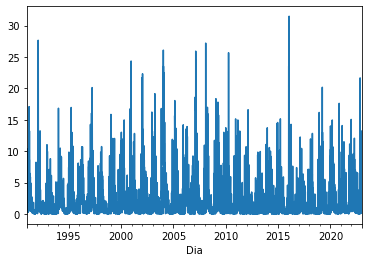

In [5]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Acumulado semanal de precipitação

In [6]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

# A semana começa no domingo.
# 1991-01-06 = domingo -> soma todos os dias 1, 2, 3, 4, 5 e 6 até domingo.
# 1991-01-13 = domingo -> soma todos os 7, 8, 9, 10, 11, 12 e 13.

acumulado_semanal = df.resample('W').sum()

acumulado_semanal

,Chuva
Dia,
1991-01-06,9.129289
1991-01-13,21.347733
1991-01-20,34.693554
1991-01-27,30.552475
1991-02-03,12.096516
...,...
2022-12-04,41.211758
2022-12-11,11.958293
2022-12-18,17.074450


## Acumulado mensal

In [7]:
acumulado_mensal = df.resample('MS').sum()

acumulado_mensal

,Chuva
Dia,
1991-01-01,100.099646
1991-02-01,79.893940
1991-03-01,164.202329
1991-04-01,71.712449
1991-05-01,56.974305
...,...
2022-08-01,35.391962
2022-09-01,14.892078
2022-10-01,16.885503


Plot básico da variável.

<AxesSubplot:xlabel='Dia'>

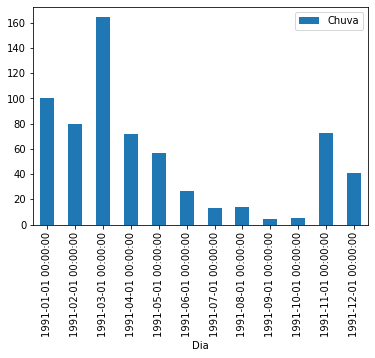

In [8]:
acumulado_mensal[0:12].plot.bar()

Formata a data sem o dia e a hora.

In [9]:
acumulado_mensal.index = acumulado_mensal.index.strftime('%Y-%m')

<AxesSubplot:xlabel='Dia'>

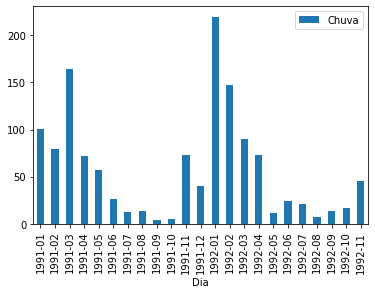

In [10]:
acumulado_mensal[0:23].plot.bar()

## Acumulado sazonal

In [11]:
acumulado_sazonal1 = df.resample('QS-DEC').sum()

acumulado_sazonal1

,Chuva
Dia,
1990-12-01,179.993587
1991-03-01,292.889083
1991-06-01,53.496950
1991-09-01,81.786779
1991-12-01,406.707208
...,...
2021-12-01,313.040377
2022-03-01,325.633091
2022-06-01,144.470741


Formata a data sem o dia.

In [12]:
acumulado_sazonal1.index = acumulado_sazonal1.index.strftime('%Y-%m')

acumulado_sazonal1

,Chuva
Dia,
1990-12,179.993587
1991-03,292.889083
1991-06,53.496950
1991-09,81.786779
1991-12,406.707208
...,...
2021-12,313.040377
2022-03,325.633091
2022-06,144.470741


Plot básico da variável.

<AxesSubplot:xlabel='Dia'>

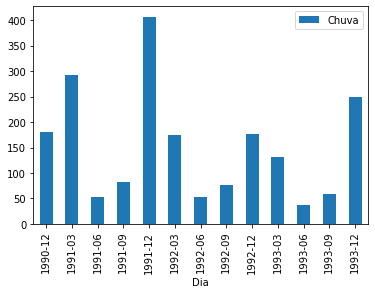

In [13]:
acumulado_sazonal1[0:13].plot.bar()

Seleciona somente a estação DJF.

In [14]:
acumulado_sazonal1[0::4]['Chuva'].index

Index(['1990-12', '1991-12', '1992-12', '1993-12', '1994-12', '1995-12',
       '1996-12', '1997-12', '1998-12', '1999-12', '2000-12', '2001-12',
       '2002-12', '2003-12', '2004-12', '2005-12', '2006-12', '2007-12',
       '2008-12', '2009-12', '2010-12', '2011-12', '2012-12', '2013-12',
       '2014-12', '2015-12', '2016-12', '2017-12', '2018-12', '2019-12',
       '2020-12', '2021-12', '2022-12'],
      dtype='object', name='Dia')

Criando um painel **plotando TODOS** os DJF, MAM, JJA e SON separadamente.

[Text(0, 0, '1991-09'),
 Text(1, 0, '1992-09'),
 Text(2, 0, '1993-09'),
 Text(3, 0, '1994-09'),
 Text(4, 0, '1995-09'),
 Text(5, 0, '1996-09'),
 Text(6, 0, '1997-09'),
 Text(7, 0, '1998-09'),
 Text(8, 0, '1999-09'),
 Text(9, 0, '2000-09'),
 Text(10, 0, '2001-09'),
 Text(11, 0, '2002-09'),
 Text(12, 0, '2003-09'),
 Text(13, 0, '2004-09'),
 Text(14, 0, '2005-09'),
 Text(15, 0, '2006-09'),
 Text(16, 0, '2007-09'),
 Text(17, 0, '2008-09'),
 Text(18, 0, '2009-09'),
 Text(19, 0, '2010-09'),
 Text(20, 0, '2011-09'),
 Text(21, 0, '2012-09'),
 Text(22, 0, '2013-09'),
 Text(23, 0, '2014-09'),
 Text(24, 0, '2015-09'),
 Text(25, 0, '2016-09'),
 Text(26, 0, '2017-09'),
 Text(27, 0, '2018-09'),
 Text(28, 0, '2019-09'),
 Text(29, 0, '2020-09'),
 Text(30, 0, '2021-09'),
 Text(31, 0, '2022-09')]

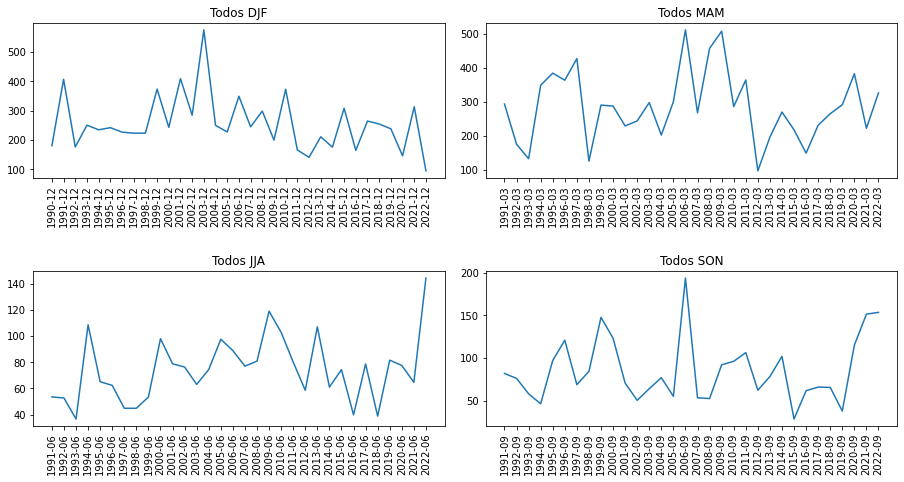

In [15]:
# Documentação:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, ax = plt.subplots(figsize=(15,7), ncols=2, nrows=2)

# Ajuste o espaçamento entre os subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.6)

# Todos os DJF:
ax[0,0].plot(acumulado_sazonal1[0::4])
ax[0,0].set_title('Todos DJF')
ax[0,0].set_xticklabels(acumulado_sazonal1.index[0::4], rotation=90)

# Todos os MAM:
ax[0,1].plot(acumulado_sazonal1[1::4])
ax[0,1].set_title('Todos MAM')
ax[0,1].set_xticklabels(acumulado_sazonal1.index[1::4], rotation=90)

# Todos os JJA:
ax[1,0].plot(acumulado_sazonal1[2::4])
ax[1,0].set_title('Todos JJA')
ax[1,0].set_xticklabels(acumulado_sazonal1.index[2::4], rotation=90)

# Todos os SON:
ax[1,1].plot(acumulado_sazonal1[3::4])
ax[1,1].set_title('Todos SON')
ax[1,1].set_xticklabels(acumulado_sazonal1.index[3::4], rotation=90)

# Salva a figura.
#plt.savefig('painel.png')

## Acumulado anual

In [16]:
acumulado_anual1 = df.resample('YS').sum()

acumulado_anual1

,Chuva
Dia,
1991-01-01,648.670719
1992-01-01,741.301761
1993-01-01,366.835639
1994-01-01,773.841206
1995-01-01,803.388304
1996-01-01,742.837349
1997-01-01,785.225591
1998-01-01,479.360757
1999-01-01,777.132795


Formata a data para mostrar somente o ano.

In [17]:
acumulado_anual1.index

DatetimeIndex(['1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Dia', freq='AS-JAN')

<AxesSubplot:xlabel='Dia'>

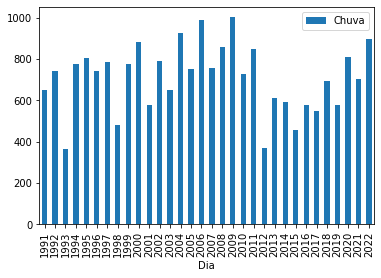

In [18]:
acumulado_anual1.index = acumulado_anual1.index.strftime("%Y")

acumulado_anual1.plot.bar()

## Média móvel

In [19]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

# Média móvel com janela deslizante.
media_movel1 = df.rolling(window=5).mean()

media_movel1.head(10)

,Chuva
Dia,
1991-01-01,NaN
1991-01-02,NaN
1991-01-03,NaN
1991-01-04,NaN
1991-01-05,1.349065
1991-01-06,1.609257
1991-01-07,2.305324
1991-01-08,2.898686
1991-01-09,2.942338


Plot básico da média móvel com janela deslizante.

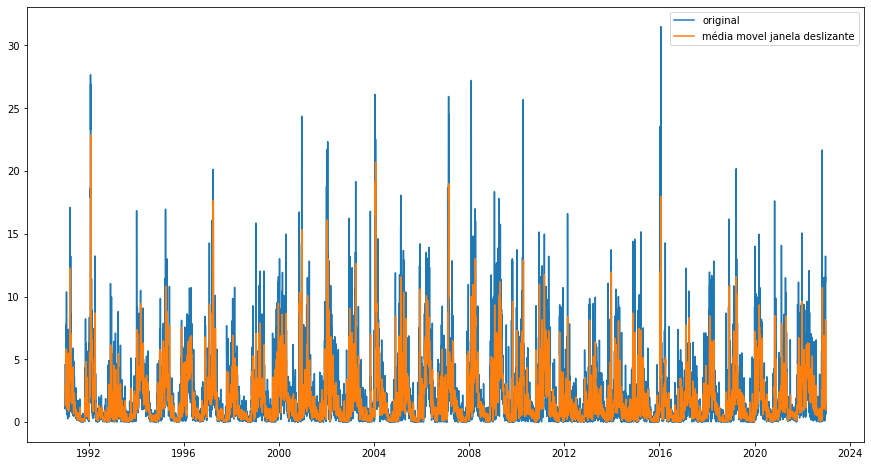

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(df, label='original')
plt.plot(media_movel1, label='média movel janela deslizante')
plt.legend()

Média móvel com janela fixa.

In [21]:
# Neste caso, calcula a média a cada 5 dias de dados (pêntada).

media_movel2 = df.resample('5D').mean()

media_movel2

,Chuva
Dia,
1991-01-01,1.349065
1991-01-06,2.798643
1991-01-11,4.138704
1991-01-16,4.747704
1991-01-21,5.576074
...,...
2022-12-09,1.191073
2022-12-14,3.208421
2022-12-19,2.969979


Plot básico da média móvel com janela fixa.

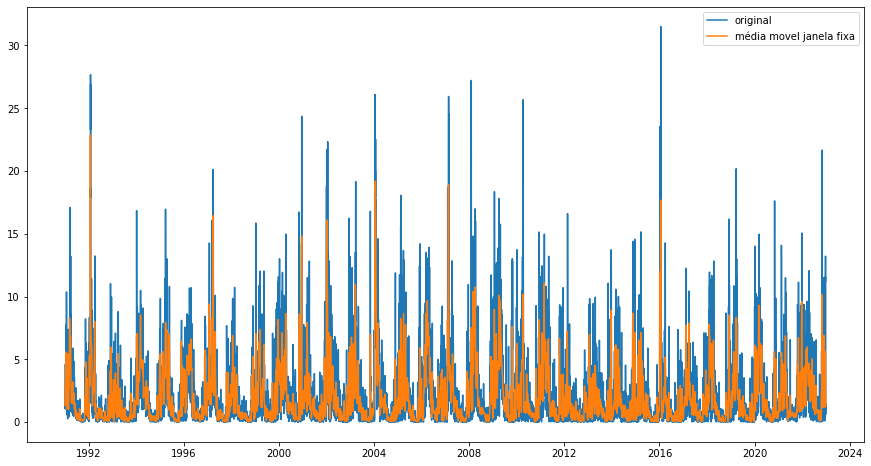

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(df, label='original')
plt.plot(media_movel2, label='média movel janela fixa')
plt.legend()

## Soma cumulativa

<AxesSubplot:xlabel='Dia'>

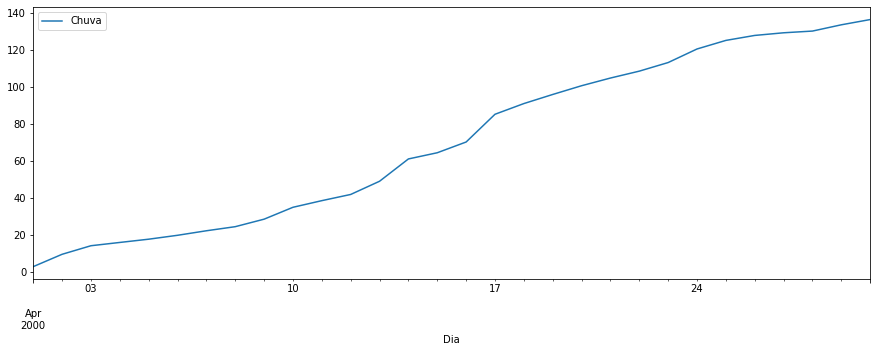

In [23]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html

soma_cumulativa = df.loc['2000-04'].cumsum()

soma_cumulativa.plot(figsize=(15,5))

## Compartimentalização (binning) - Histograma

Como saber qual é o máximo valor de bins a serem utilizados? Basta usar o **describe()**.

In [24]:
df.describe()

,Chuva
count,11687.000000
mean,1.942384
std,2.798179
min,0.000000
25%,0.260504
50%,0.857347
75%,2.442850
max,31.495855


In [25]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Intervalos de interesse em mm/dia.
bins1 = [0, 2.5, 7.6, 15, 30, 50, 75, 100]

# Cria o histograma.
chuva1 = pd.cut(
    df['Chuva'], 
    bins1
)

In [26]:
chuva1

Dia
1991-01-01    (0.0, 2.5]
1991-01-02    (0.0, 2.5]
1991-01-03    (0.0, 2.5]
1991-01-04    (0.0, 2.5]
1991-01-05    (0.0, 2.5]
                 ...    
2022-12-27    (0.0, 2.5]
2022-12-28    (0.0, 2.5]
2022-12-29    (0.0, 2.5]
2022-12-30    (0.0, 2.5]
2022-12-31    (0.0, 2.5]
Name: Chuva, Length: 11688, dtype: category
Categories (7, interval[float64, right]): [(0.0, 2.5] < (2.5, 7.6] < (7.6, 15.0] < (15.0, 30.0] < (30.0, 50.0] < (50.0, 75.0] < (75.0, 100.0]]

Contagem das categorias

In [27]:
pd.value_counts(chuva1)

Chuva
(0.0, 2.5]       8809
(2.5, 7.6]       2268
(7.6, 15.0]       513
(15.0, 30.0]       68
(30.0, 50.0]        1
(50.0, 75.0]        0
(75.0, 100.0]       0
Name: count, dtype: int64

Plot do histograma com suas classes.

<AxesSubplot:xlabel='Chuva'>

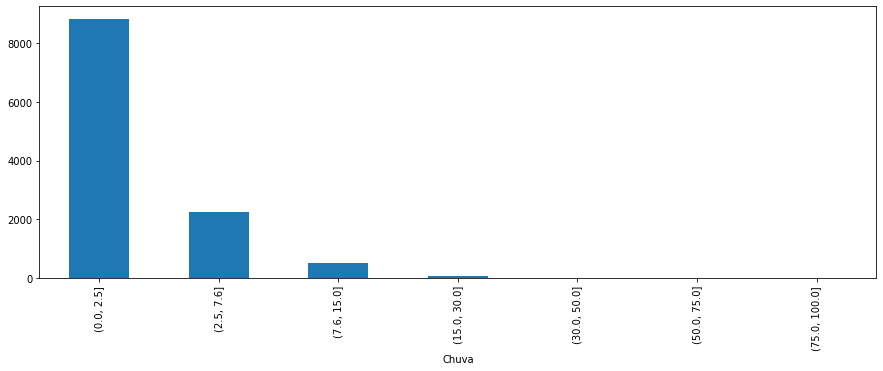

In [28]:
pd.value_counts(chuva1).plot.bar(figsize=(15,5))

Cria a coluna **bin** e adiciona os intervalos do histograma no DataFrame.

In [29]:
# Cria a coluna 'bin' no DataFrame 'df1' que receberá os valores de 'chuva1'.
df['bin'] = chuva1

df

,Chuva,bin
Dia,,
1991-01-01,1.083005,"(0.0, 2.5]"
1991-01-02,1.132334,"(0.0, 2.5]"
1991-01-03,1.101605,"(0.0, 2.5]"
1991-01-04,1.662441,"(0.0, 2.5]"
1991-01-05,1.765939,"(0.0, 2.5]"
...,...,...
2022-12-27,0.583862,"(0.0, 2.5]"
2022-12-28,0.579153,"(0.0, 2.5]"
2022-12-29,1.396807,"(0.0, 2.5]"


Adicionando rótulos (nomes) nas classes do histograma.

In [30]:
# Bins.
bins2 = [0, 2.5, 7.6, 15, 30, 50, 75, 100]

# Observação: A quantidade de rótulos (classificacao) tem que ser uma unidade menor que a 
# quantidade de classes (bins2).
# Exemplo: são utilizados 8 bins, logo a quantidade de rótulos deverá ser de 8-1=7 rótulos.

# Rótulos.
classificacao = [
    'Muito Fraca', 
    'Fraca', 
    'Moderada', 
    'Moderadamente Forte', 
    'Forte', 
    'Muito Forte', 
    'Extremamente Forte'
]

# Cria o histograma.
chuva2 = pd.cut(
    df['Chuva'], 
    bins2, 
    labels=classificacao
)

chuva2

Dia
1991-01-01    Muito Fraca
1991-01-02    Muito Fraca
1991-01-03    Muito Fraca
1991-01-04    Muito Fraca
1991-01-05    Muito Fraca
                 ...     
2022-12-27    Muito Fraca
2022-12-28    Muito Fraca
2022-12-29    Muito Fraca
2022-12-30    Muito Fraca
2022-12-31    Muito Fraca
Name: Chuva, Length: 11688, dtype: category
Categories (7, object): ['Muito Fraca' < 'Fraca' < 'Moderada' < 'Moderadamente Forte' < 'Forte' < 'Muito Forte' < 'Extremamente Forte']

Contabiliza a quantidade de valores para cada rótulo (classificacao).

In [31]:
pd.value_counts(chuva2)

Chuva
Muito Fraca            8809
Fraca                  2268
Moderada                513
Moderadamente Forte      68
Forte                     1
Muito Forte               0
Extremamente Forte        0
Name: count, dtype: int64

Plot básico do histograma com rótulos.

<AxesSubplot:xlabel='Chuva'>

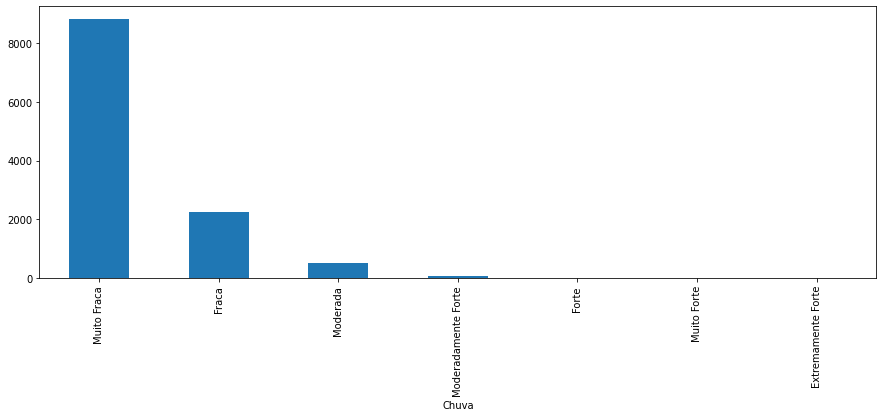

In [32]:
pd.value_counts(chuva2).plot.bar(figsize=(15,5))

In [33]:
# Cria a coluna 'Classificacao' no DataFrame 'df1' que recebe o valor da variável chuva2.
df['Classificacao'] = chuva2

In [34]:
df

,Chuva,bin,Classificacao
Dia,,,
1991-01-01,1.083005,"(0.0, 2.5]",Muito Fraca
1991-01-02,1.132334,"(0.0, 2.5]",Muito Fraca
1991-01-03,1.101605,"(0.0, 2.5]",Muito Fraca
1991-01-04,1.662441,"(0.0, 2.5]",Muito Fraca
1991-01-05,1.765939,"(0.0, 2.5]",Muito Fraca
...,...,...,...
2022-12-27,0.583862,"(0.0, 2.5]",Muito Fraca
2022-12-28,0.579153,"(0.0, 2.5]",Muito Fraca
2022-12-29,1.396807,"(0.0, 2.5]",Muito Fraca


In [35]:
# Remove a coluna 'bin' do DataFrame.
df.drop(columns=['bin', 'Classificacao'], inplace=True)

In [36]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


## Meses mais chuvosos

In [37]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

# Acumulado mensal.
chuva_acumulada1 = df.resample('MS').sum()

# Formata a data de forma a remover o dia.
chuva_acumulada1.index = chuva_acumulada1.index.strftime('%Y-%m')

# Renomeia o index de 'Dia' para 'Mes'.
chuva_acumulada1.index.name = 'Mes'

chuva_acumulada1

,Chuva
Mes,
1991-01,100.099646
1991-02,79.893940
1991-03,164.202329
1991-04,71.712449
1991-05,56.974305
...,...
2022-08,35.391962
2022-09,14.892078
2022-10,16.885503


Os 5 meses mais chuvosos.

<AxesSubplot:xlabel='Mes'>

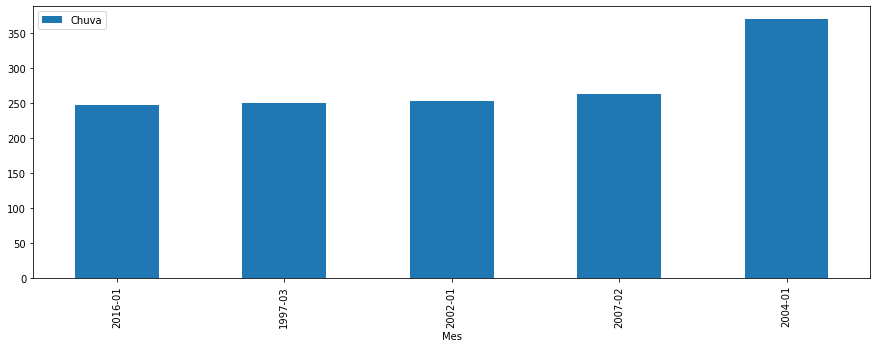

In [38]:
# 'Chuva' é a coluna do DataFrame.

NumeroMeses = 5
meses_mais_chuvoso = chuva_acumulada1.nlargest(NumeroMeses, 'Chuva')

# Ordena de forma crescente os valores dos meses mais chuvosos.
meses_mais_chuvoso.sort_values(by='Chuva').plot.bar(figsize=(15,5))

## Meses menos chuvosos

In [39]:
# Documentação
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html

# Acumulado mensal.
chuva_acumulada2 = df.resample('MS').sum()

# Formata a data de forma a remover o dia.
chuva_acumulada2.index = chuva_acumulada2.index.strftime('%Y-%m')

# Renomeia o index de 'Dia' para 'Mes'.
chuva_acumulada2.index.name = 'Mes'

chuva_acumulada2

,Chuva
Mes,
1991-01,100.099646
1991-02,79.893940
1991-03,164.202329
1991-04,71.712449
1991-05,56.974305
...,...
2022-08,35.391962
2022-09,14.892078
2022-10,16.885503


<AxesSubplot:xlabel='Mes'>

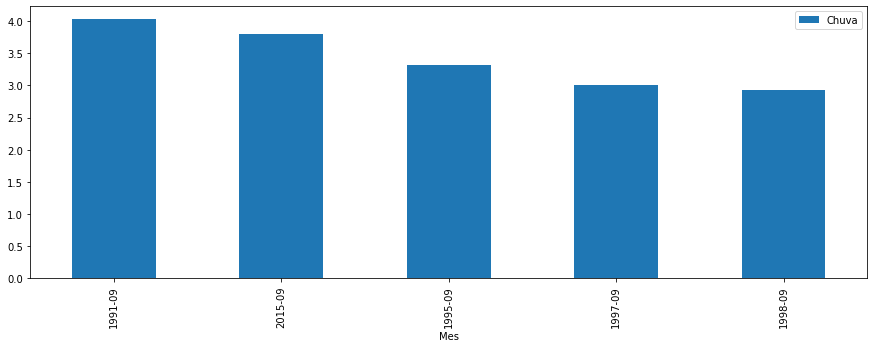

In [40]:
# 'Chuva' é a coluna do DataFrame.

NumeroMeses = 5
meses_menos_chuvosos = chuva_acumulada2.nsmallest(NumeroMeses, 'Chuva')

# Ordena de forma crescente os valores dos meses mais chuvosos.
meses_menos_chuvosos.sort_values(by='Chuva', ascending=False).plot.bar(figsize=(15,5))

## Reshape

Reshape ou remodelar consistem em alterar a estrutura ou o formato dos dados analisados de forma que eles sejam mais adequados para realizar uma determinada análise ou visualização.

In [41]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


In [42]:
# Uso do reshape para organizar o dado no formato vetor para o formato tabular (linhas x colunas).
# 32 = anos.
# 12 = meses.

dado_reshape = chuva_acumulada2['Chuva'].values.reshape(32,12)

# Nome dos rótulos das colunas.
colunas = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Nome dos rótulos do index.
index = range(1991, 2023)

# Cria o DataFrame.
df2 = pd.DataFrame(
    data=dado_reshape, 
    index=index, 
    columns=colunas
)

df2

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1991,100.099646,79.893940,164.202329,71.712449,56.974305,26.477652,12.856383,14.162914,4.031318,5.157082,72.598380,40.504320
1992,219.365838,146.837050,89.832540,73.233083,11.459463,24.571975,21.251295,6.829009,13.757358,16.847679,45.421162,71.895308
1993,49.076026,54.951604,55.997140,48.910159,27.047003,14.300651,15.272164,7.003137,7.962822,21.911219,28.046429,36.357286
1994,113.659772,100.130545,176.620997,109.186761,62.264040,71.403966,30.487092,6.763389,8.827073,8.378450,28.984001,57.135119
1995,67.111676,110.128860,131.431263,148.319529,103.969422,29.755495,28.987825,6.343277,3.320883,15.852721,77.894939,80.272415
1996,75.620965,85.704758,147.965641,161.022716,53.885691,28.335045,16.862794,17.105372,7.448889,20.105777,93.265490,35.514211
1997,125.218679,65.670997,250.012930,116.590857,59.936182,15.083758,18.377229,11.314254,3.000110,32.169334,33.424680,54.426581
1998,110.865513,57.572249,74.942890,32.091287,17.635043,16.528275,16.960138,11.296472,2.924803,6.543128,74.763913,57.237045
1999,80.350378,85.277602,150.435405,55.227839,84.036904,17.328327,19.017814,17.067169,21.352269,39.673623,86.691563,120.673901
2000,109.138180,143.464437,110.721965,136.306123,39.746944,38.314618,33.246495,26.505228,25.393209,8.040904,89.847907,121.982460


Plot básico da chuva.

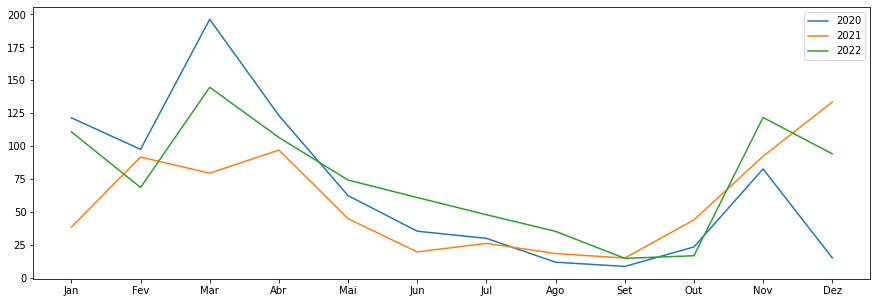

In [43]:
fig, ax = plt.subplots(figsize=(15,5))

# Loop em alguns anos.
for ano in range(2020, 2023):
    plt.plot(df2.loc[ano,:], label=ano)
    plt.legend()

## Climatologia

Um pouco sobre eixos (axis) no Python.

* axis = 0 -> linhas.
* axis = 1 -> colunas.

<img src="../figuras/eixos.jpg" width="30%" height="30%">

In [44]:
# axis = 0 -> faz cálculo nas linhas.
# axis = 1 -> faz cálculo nas colunas.

# Seleciona os anos de interesse.
AnoInicial, AnoFinal = 1991, 2020

climatologia = df2.loc[AnoInicial:AnoFinal].mean(axis=0)

climatologia

Jan    102.440200
Fev    101.429040
Mar    128.680378
Abr    101.024076
Mai     56.135792
Jun     33.991386
Jul     24.328672
Ago     14.224649
Set     11.540403
Out     21.283687
Nov     48.164701
Dez     60.147751
dtype: float64

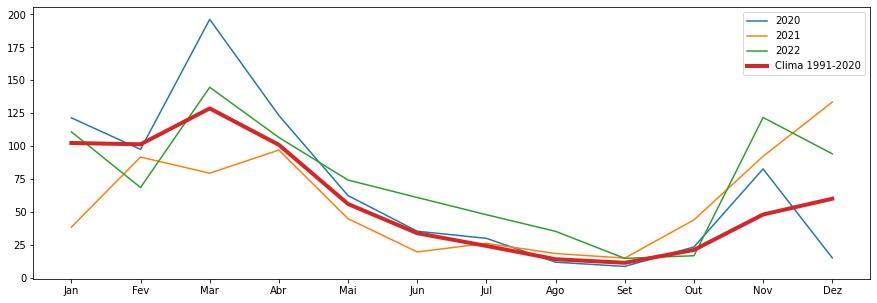

In [45]:
fig, ax = plt.subplots(figsize=(15,5))

# Plot básico da chuva.
for ano in range(2020, 2023):
    plt.plot(df2.loc[ano,:], label=ano)

# Plot da climatologia.
plt.plot(climatologia, lw=4, label='Clima 1991-2020')

# Mostra a legenda no gráfico.
plt.legend()

## Anomalia

Anomalia = Valor observado - Climatologia

In [46]:
df2.loc[1991]

Jan    100.099646
Fev     79.893940
Mar    164.202329
Abr     71.712449
Mai     56.974305
Jun     26.477652
Jul     12.856383
Ago     14.162914
Set      4.031318
Out      5.157082
Nov     72.598380
Dez     40.504320
Name: 1991, dtype: float64

In [47]:
lista = []
anos = []

for ano in range(1991, 1993):
    anomalia = df2.loc[ano] - climatologia
    lista.append(anomalia)
    anos.append(ano)

In [48]:
df3 = pd.DataFrame(lista, index=anos)

df3

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1991,-2.340554,-21.535099,35.521952,-29.311627,0.838513,-7.513734,-11.472289,-0.061734,-7.509085,-16.126605,24.433678,-19.643431
1992,116.925638,45.408011,-38.847837,-27.790994,-44.676329,-9.419411,-3.077377,-7.395639,2.216955,-4.436008,-2.743539,11.747557


O stack faz o empilhamento dos anos.

In [49]:
df4 = df3.stack().reset_index()

df4

,level_0,level_1,0
0,1991,Jan,-2.340554
1,1991,Fev,-21.535099
2,1991,Mar,35.521952
3,1991,Abr,-29.311627
4,1991,Mai,0.838513
5,1991,Jun,-7.513734
6,1991,Jul,-11.472289
7,1991,Ago,-0.061734
8,1991,Set,-7.509085
9,1991,Out,-16.126605


Renomeia as colunas.

In [50]:
df4.rename(
    columns={'level_0':'Ano', 
             'level_1':'Mes', 
             0:'Chuva'},
    inplace=True
)

In [51]:
df4

,Ano,Mes,Chuva
0,1991,Jan,-2.340554
1,1991,Fev,-21.535099
2,1991,Mar,35.521952
3,1991,Abr,-29.311627
4,1991,Mai,0.838513
5,1991,Jun,-7.513734
6,1991,Jul,-11.472289
7,1991,Ago,-0.061734
8,1991,Set,-7.509085
9,1991,Out,-16.126605


In [52]:
# Dicionário de meses para converte de mês string para mês inteiro (1, 2, ..., 12).

meses = {
    'Jan': 1, 
    'Fev': 2, 
    'Mar': 3, 
    'Abr': 4, 
    'Mai': 5, 
    'Jun': 6, 
    'Jul': 7, 
    'Ago': 8, 
    'Set': 9, 
    'Out': 10, 
    'Nov': 11,
    'Dez': 12
}

Substitui mês string por mes numérico inteiro.

In [53]:
df4['Mes'] = df4['Mes'].replace(meses)

In [54]:
df4

,Ano,Mes,Chuva
0,1991,1,-2.340554
1,1991,2,-21.535099
2,1991,3,35.521952
3,1991,4,-29.311627
4,1991,5,0.838513
5,1991,6,-7.513734
6,1991,7,-11.472289
7,1991,8,-0.061734
8,1991,9,-7.509085
9,1991,10,-16.126605


Cria uma coluna chamada 'Data' no DataFrame. Junta as colunas 'Ano' e 'Mes' para gerar a coluna com a data formatada.

In [55]:
df4['Data'] = pd.to_datetime(
    df4[['Ano', 'Mes']].astype(str).agg(' '.join, axis=1), 
    format='%Y %m'
)

In [56]:
df4

,Ano,Mes,Chuva,Data
0,1991,1,-2.340554,1991-01-01
1,1991,2,-21.535099,1991-02-01
2,1991,3,35.521952,1991-03-01
3,1991,4,-29.311627,1991-04-01
4,1991,5,0.838513,1991-05-01
5,1991,6,-7.513734,1991-06-01
6,1991,7,-11.472289,1991-07-01
7,1991,8,-0.061734,1991-08-01
8,1991,9,-7.509085,1991-09-01
9,1991,10,-16.126605,1991-10-01


In [57]:
# Remove colunas desnecessárias.
df4.drop(
    columns=['Ano', 'Mes'], 
    inplace=True
)

# Define a coluna 'Data' como index.
df4.set_index(
    'Data', 
    inplace=True
)

# Formata a data de forma a remover o dia.
df4.index = df4.index.strftime('%Y-%m')

df4

,Chuva
Data,
1991-01,-2.340554
1991-02,-21.535099
1991-03,35.521952
1991-04,-29.311627
1991-05,0.838513
1991-06,-7.513734
1991-07,-11.472289
1991-08,-0.061734
1991-09,-7.509085


<AxesSubplot:xlabel='Data'>

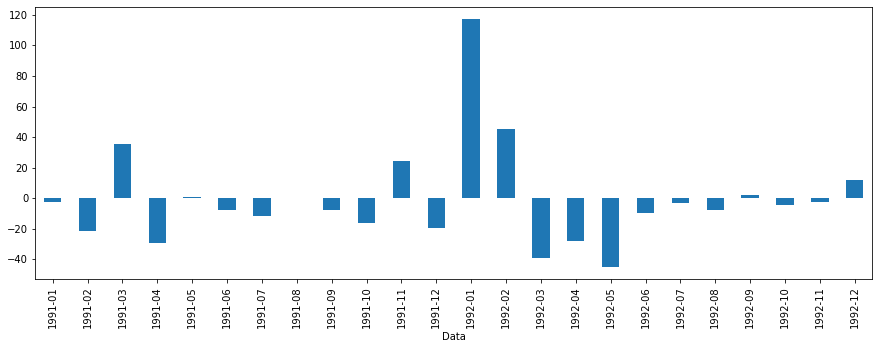

In [58]:
fig, ax = plt.subplots(figsize=(15,5))

df4['Chuva'].plot.bar()

Parei aqui!!!!

## Acumulado anual

In [59]:
acumulado_anual = df4.sum(axis=1)

df4['Total'] = acumulado_anual

df4

,Chuva,Total
Data,,
1991-01,-2.340554,-2.340554
1991-02,-21.535099,-21.535099
1991-03,35.521952,35.521952
1991-04,-29.311627,-29.311627
1991-05,0.838513,0.838513
1991-06,-7.513734,-7.513734
1991-07,-11.472289,-11.472289
1991-08,-0.061734,-0.061734
1991-09,-7.509085,-7.509085


In [60]:
# Valor médio anual de chuva;
media_anual = df4['Total'].mean()

media_anual

-0.7003745964089964

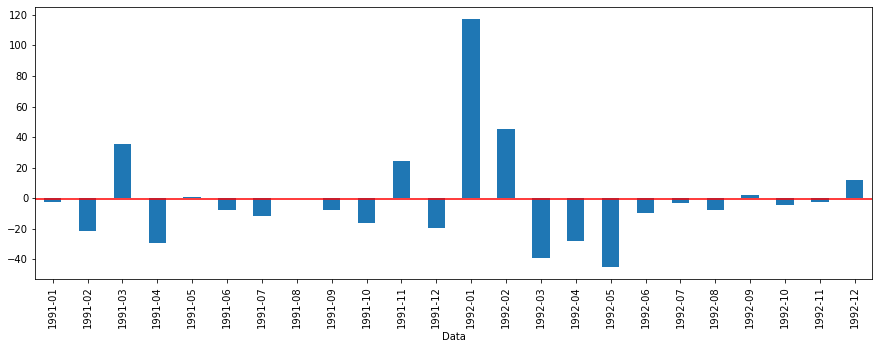

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

# Plot básico de chuva.
df4['Total'].plot.bar()

# Plota uma linha horizontal no valor da média anual.
plt.axhline(y=media_anual, c='red')

## Anomalia anual

<AxesSubplot:xlabel='Data'>

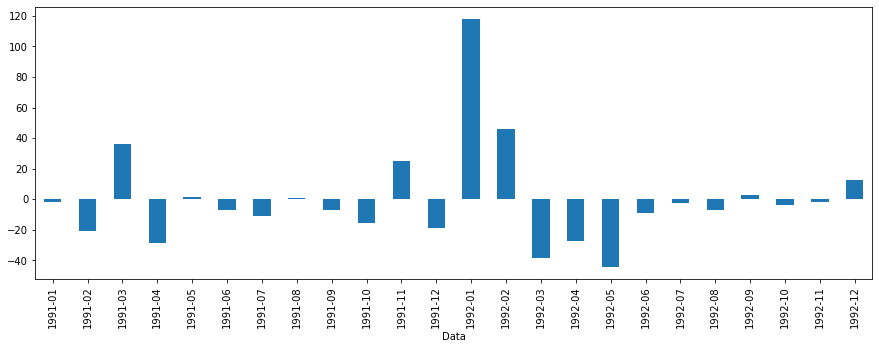

In [62]:
df4['Anom. Anual'] = df4['Total'] - media_anual

df4['Anom. Anual'].plot.bar(figsize=(15,5))

## Aumento ou reduação percentual

Em relação à média anual, qual foi o aumento ou decremento percentual.

In [63]:
df4['Porcentagem'] = ((df4['Total'] / media_anual) * 100) - 100

df4

,Chuva,Total,Anom. Anual,Porcentagem
Data,,,,
1991-01,-2.340554,-2.340554,-1.640179,234.185966
1991-02,-21.535099,-21.535099,-20.834725,2974.797301
1991-03,35.521952,35.521952,36.222326,-5171.850379
1991-04,-29.311627,-29.311627,-28.611253,4085.135702
1991-05,0.838513,0.838513,1.538887,-219.723441
1991-06,-7.513734,-7.513734,-6.813360,972.816490
1991-07,-11.472289,-11.472289,-10.771914,1538.021827
1991-08,-0.061734,-0.061734,0.638640,-91.185541
1991-09,-7.509085,-7.509085,-6.808711,972.152716


<AxesSubplot:xlabel='Data'>

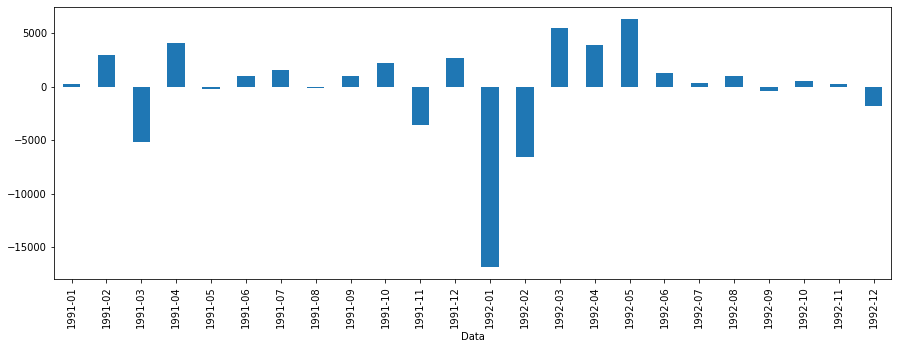

In [64]:
df4['Porcentagem'].plot.bar(figsize=(15,5))

## Mudança (positivva ou negativa) percentual (%) de um ano para o ano seguinte

Qual é a porcentagem de mudança de um ano A para um ano B? A função **pct_change** faz este cálculo.

Exemplo:
- Chuva total em 1991: 648.670776
- Chuva total em 1992: 741.301758
- A mudança de 1991 para 1992 foi de: (741.301758 / 648.670776) x 100 = 114,2801226 - 100 = +14,280717%.

In [65]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

df4['Change'] = df4['Total'].pct_change()*100.

df4

,Chuva,Total,Anom. Anual,Porcentagem,Change
Data,,,,,
1991-01,-2.340554,-2.340554,-1.640179,234.185966,NaN
1991-02,-21.535099,-21.535099,-20.834725,2974.797301,820.085704
1991-03,35.521952,35.521952,36.222326,-5171.850379,-264.949097
1991-04,-29.311627,-29.311627,-28.611253,4085.135702,-182.516939
1991-05,0.838513,0.838513,1.538887,-219.723441,-102.860682
1991-06,-7.513734,-7.513734,-6.813360,972.816490,-996.078899
1991-07,-11.472289,-11.472289,-10.771914,1538.021827,52.684251
1991-08,-0.061734,-0.061734,0.638640,-91.185541,-99.461884
1991-09,-7.509085,-7.509085,-6.808711,972.152716,12063.567574


<AxesSubplot:xlabel='Data'>

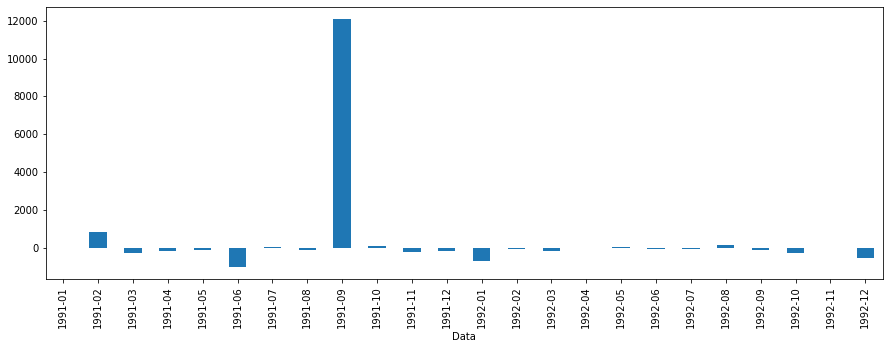

In [66]:
df4['Change'].plot.bar(figsize=(15,5))

## Heatmap

In [67]:
import seaborn as sns

In [68]:
# Seleciona todos os anos e apenas as colunas de Jan até Dez.
df5 = df4.iloc[:,0:12]

df5

,Chuva,Total,Anom. Anual,Porcentagem,Change
Data,,,,,
1991-01,-2.340554,-2.340554,-1.640179,234.185966,NaN
1991-02,-21.535099,-21.535099,-20.834725,2974.797301,820.085704
1991-03,35.521952,35.521952,36.222326,-5171.850379,-264.949097
1991-04,-29.311627,-29.311627,-28.611253,4085.135702,-182.516939
1991-05,0.838513,0.838513,1.538887,-219.723441,-102.860682
1991-06,-7.513734,-7.513734,-6.813360,972.816490,-996.078899
1991-07,-11.472289,-11.472289,-10.771914,1538.021827,52.684251
1991-08,-0.061734,-0.061734,0.638640,-91.185541,-99.461884
1991-09,-7.509085,-7.509085,-6.808711,972.152716,12063.567574


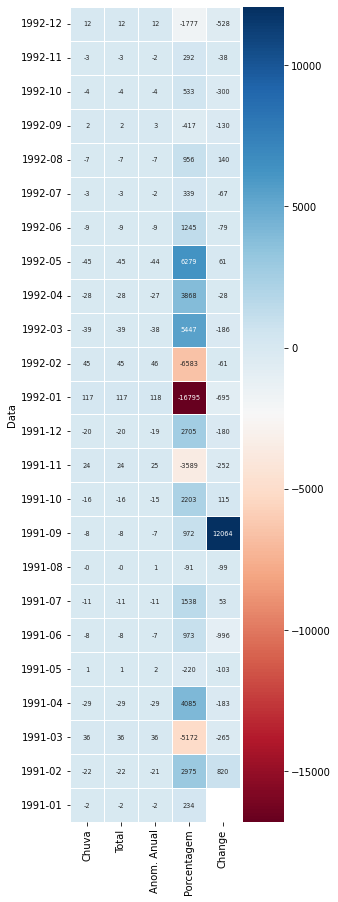

In [69]:
# Plot do heatmap.

fig, ax = plt.subplots(figsize=(20, 15))
    
ax = sns.heatmap(df5, 
                 cmap='RdBu', 
                 linewidths=0.5, 
                 fmt='2.0f',
                 annot_kws={'size': 6.5},
                 cbar_kws={'orientation': 'vertical', 'shrink': 1, 'pad':0.003},  
                 annot=True, 
                 square=True
)

# Inverte o eixo y.
ax.invert_yaxis()